In [1]:
# 繪圖設定字體顏色(否則黑色會看不到)
import matplotlib as mpl
COLOR1 = 'red'
COLOR2 = 'blue'
mpl.rcParams['text.color'] = COLOR1
mpl.rcParams['axes.labelcolor'] = COLOR2
mpl.rcParams['xtick.color'] = COLOR2
mpl.rcParams['ytick.color'] = COLOR2

# 臉部輪廓(Face Landmark)

### (1)dlib

所有臉 = [[136, 136, 394, 394]]
所有臉 = [[136, 136, 394, 394]]


(-0.5, 480.5, 653.5, -0.5)

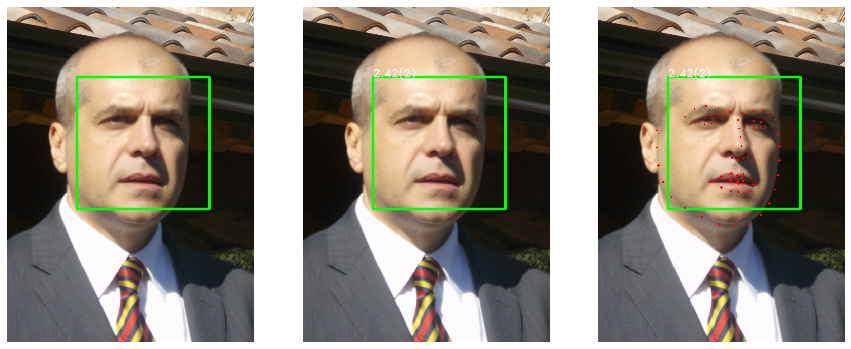

In [3]:
# (1)dlib：影像
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import dlib
# 載入圖片：BGR
img = cv2.imread('data/ciaburro.jpg')
img2 = img.copy()
img3 = img.copy()

# 正面人臉偵測器
detector = dlib.get_frontal_face_detector()

# 1.單純偵測人臉
    # 第二個參數
        # 指定反取樣(unsample)次數
        # 如果圖片太小，將其設為 1 可測出更多臉
    # 回傳值 rectangles[第一張臉[(左上x, 左上y) (右下x, 右下y)], ...]
face_rects = detector(img, 0)
# 取出所有偵測的結果
faces = []
for i, d in enumerate(face_rects):
    x1 = d.left()
    y1 = d.top()
    x2 = d.right()
    y2 = d.bottom()
    faces.append([x1, y1, x2, y2])
print('所有臉 =', faces)     # [[136, 136, 394, 394]]
# 畫框
for face in faces:
    cv2.rectangle(img, tuple(face[:2]), tuple(face[-2:]), (0, 255, 0), 4, cv2.LINE_AA)

# 2.偵測人臉，輸出分數
    # detector.run
        # 第三個參數：指定分數閾值，超過閾值的偵測結果都會被輸出
    # 回傳值
        # face_rects2同上：rectangles[第一張臉[(左上x, 左上y) (右下x, 右下y)], ...]
        # scores：[第一張臉 分數, ...]
        # idx：[第一張臉 子偵測器編號, ...] → 子偵測器編號可判斷人臉方向
face_rects2, scores, idx = detector.run(img2, 0, 0)
# 取出所有偵測的結果
faces2 = []
for i, d in enumerate(face_rects2):
    x1 = d.left()
    y1 = d.top()
    x2 = d.right()
    y2 = d.bottom()
    faces2.append([x1, y1, x2, y2])
print('所有臉 =', faces2)
# 畫框 + 標示分數
for i, face in enumerate(faces2):
    cv2.rectangle(img2, tuple(face[:2]), tuple(face[-2:]), (0, 255, 0), 4, cv2.LINE_AA)
    text = "%2.2f(%d)" % (scores[i], idx[i])
    cv2.putText(img2, text, tuple(face[:2]), cv2.FONT_HERSHEY_DUPLEX, 
                0.7, (255, 255, 255), 1, cv2.LINE_AA)

# 3.訓練好的 人臉68點特徵檢測器：檔案太大請搜尋下載
    # predictor參數(圖片, 圖片預測的邊界框)
    # shape回傳 68個關鍵點位置
        # e.g.
            # shape = predictor(img3, face_rects[0])
            # shape_np = shape_to_np(shape)
predictor = dlib.shape_predictor('data/shape_predictor_68_face_landmarks.dat')

    # shape_predictor 預測結果轉成numpy，shape=(68, 2)
def shape_to_np(dlib_shape, dtype="int"):
    # dlib_shape.num_parts 代表有幾組座標 → 轉成 array shape=(幾個偵測點, 2)
    coordinates = np.zeros((dlib_shape.num_parts, 2), dtype=dtype)
    # 寫入空的numpy矩陣
        # shape.part(i).x 取出x座標，shape.part(i).y 取出y座標
    for i in range(0, dlib_shape.num_parts):
        coordinates[i] = (dlib_shape.part(i).x, dlib_shape.part(i).y)
    return coordinates

    # 2的結果 加上 人臉68點特徵
face_rects3, scores3, idx3 = detector.run(img3, 0, 0)
for i, d in enumerate(face_rects3):
    # 畫框
    x1 = d.left()
    y1 = d.top()
    x2 = d.right()
    y2 = d.bottom()
    cv2.rectangle(img3, (x1, y1), (x2, y2), (0, 255, 0), 4, cv2.LINE_AA)
    # 標示分數
    text = "%2.2f(%d)" % (scores3[i], idx3[i])
    cv2.putText(img3, text, (x1, y1), cv2.FONT_HERSHEY_DUPLEX, 0.7, (255, 255, 255), 1, cv2.LINE_AA)
    # 人臉68點特徵檢測器
    shape = predictor(img3, d)
    shape_np = shape_to_np(shape)
    for p in shape_np:
        cv2.circle(img3, tuple(p), 2, (0, 0, 255), -1)
    
# 繪圖
plt.figure(figsize=(15, 10))
plt.subplot(131)
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB)
plt.axis('off')
plt.subplot(132)
img2_RGB = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2_RGB)
plt.axis('off')
plt.subplot(133)
img3_RGB = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3_RGB)
plt.axis('off')

In [23]:
# (1)dlib：影片
import time
import numpy as np
import cv2
import dlib
# 正面人臉偵測器
detector = dlib.get_frontal_face_detector()
# 影片
cap = cv2.VideoCapture('data/hamilton_clip.mp4')
num_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
while cap.isOpened():
    time.sleep(0.05)
    retval, image = cap.read()
    face_rects2, scores, idx = detector.run(image, 0, 0)
    # 取出所有偵測的結果
    faces2 = []
    for i, d in enumerate(face_rects2):
        x1 = d.left()
        y1 = d.top()
        x2 = d.right()
        y2 = d.bottom()
        faces2.append([x1, y1, x2, y2])
    # 畫框 + 標示分數
    for i, face in enumerate(faces2):
        cv2.rectangle(image, tuple(face[:2]), tuple(face[-2:]), (0, 255, 0), 4, cv2.LINE_AA)
        text = "%2.2f(%d)" % (scores[i], idx[i])
        cv2.putText(image, text, tuple(face[:2]), cv2.FONT_HERSHEY_DUPLEX, 
                    0.7, (255, 255, 255), 1, cv2.LINE_AA)
        cv2.imshow('face', image)  
    # 按q退出
    k = cv2.waitKey(1)
    if k == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

(-0.5, 481.5, 503.5, -0.5)

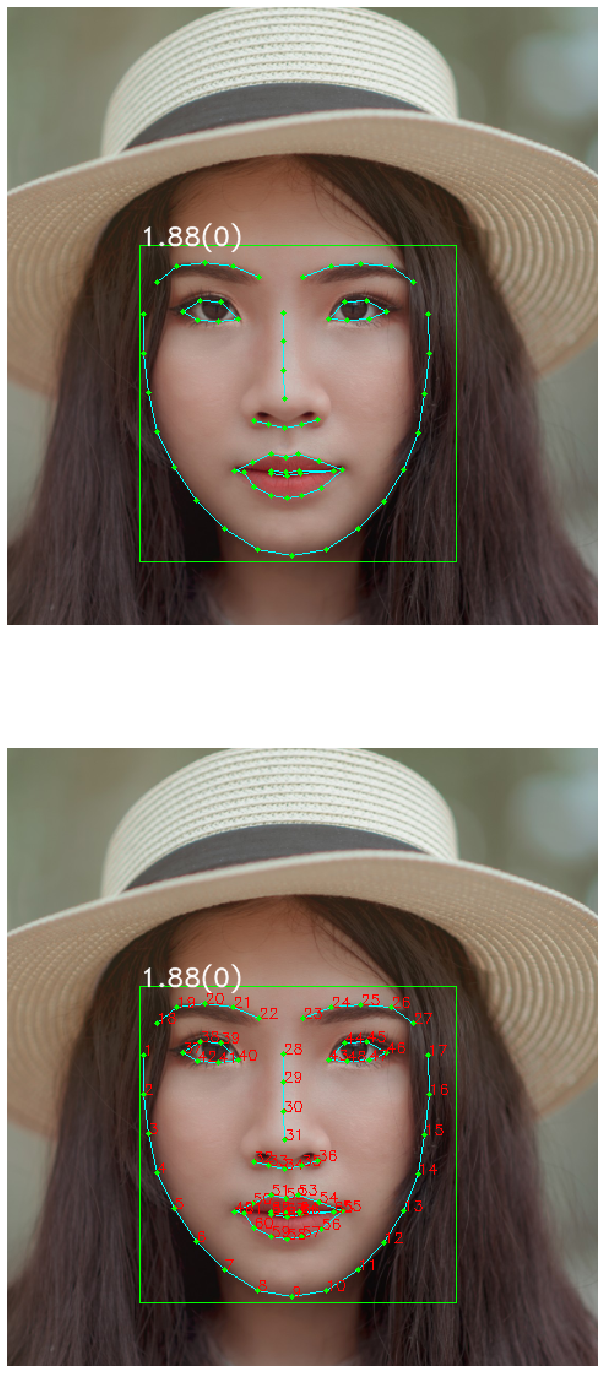

In [21]:
# (1)dlib：影像 完整案例
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import dlib
# 定義 不同部位 68個點 index list
JAWLINE_POINTS = list(range(0, 17))
RIGHT_EYEBROW_POINTS = list(range(17, 22))
LEFT_EYEBROW_POINTS = list(range(22, 27))
NOSE_BRIDGE_POINTS = list(range(27, 31))
LOWER_NOSE_POINTS = list(range(31, 36))
RIGHT_EYE_POINTS = list(range(36, 42))
LEFT_EYE_POINTS = list(range(42, 48))
MOUTH_OUTLINE_POINTS = list(range(48, 61))
MOUTH_INNER_POINTS = list(range(61, 68))
ALL_POINTS = list(range(0, 68))

# 畫線
def draw_shape_lines_range(np_shape, image, range_points, is_closed=False):
    # 指定第幾組x, y
    np_shape_display = np_shape[range_points]
    # 確保整數
    points = np.array(np_shape_display, dtype=np.int32)
    # 畫線
    cv2.polylines(image, [points], is_closed, (255, 255, 0), thickness=1, lineType=cv2.LINE_8)

# 每個部位 逐一畫線：左右眼 嘴唇內外 曲線封閉
def draw_shape_lines_all(np_shape, image):
    draw_shape_lines_range(np_shape, image, JAWLINE_POINTS)
    draw_shape_lines_range(np_shape, image, RIGHT_EYEBROW_POINTS)
    draw_shape_lines_range(np_shape, image, LEFT_EYEBROW_POINTS)
    draw_shape_lines_range(np_shape, image, NOSE_BRIDGE_POINTS)
    draw_shape_lines_range(np_shape, image, LOWER_NOSE_POINTS)
    draw_shape_lines_range(np_shape, image, RIGHT_EYE_POINTS, True)
    draw_shape_lines_range(np_shape, image, LEFT_EYE_POINTS, True)
    draw_shape_lines_range(np_shape, image, MOUTH_OUTLINE_POINTS, True)
    draw_shape_lines_range(np_shape, image, MOUTH_INNER_POINTS, True)

# 逐一畫點
def draw_shape_points(np_shape, image):
    for (x, y) in np_shape:
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

# 逐一編號文字 + 逐一畫點
def draw_shape_points_pos(np_shape, image):
    for idx, (x, y) in enumerate(np_shape):
        # 標示文字：逐一編號
        cv2.putText(image, str(idx+1), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 255))
        # 逐一畫點
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

# shape_predictor 預測結果轉成numpy，shape=(68, 2)
def shape_to_np(dlib_shape, dtype="int"):
    # dlib_shape.num_parts 代表有幾組座標 → 轉成 array shape=(幾個偵測點, 2)
    coordinates = np.zeros((dlib_shape.num_parts, 2), dtype=dtype)
    # 寫入空的numpy矩陣
        # shape.part(i).x 取出x座標，shape.part(i).y 取出y座標
    for i in range(0, dlib_shape.num_parts):
        coordinates[i] = (dlib_shape.part(i).x, dlib_shape.part(i).y)
    return coordinates

# 圖片
test_face = cv2.imread('data/face_test.png')
test_face2 = test_face.copy()
gray = cv2.cvtColor(test_face, cv2.COLOR_BGR2GRAY)

# 正面人臉偵測器
detector = dlib.get_frontal_face_detector()
# 訓練好的 人臉特徵檢測器(68點 和 5點)：檔案太大請自行搜尋下載
# p = "shape_predictor_5_face_landmarks.dat"
p = "shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor('data/'+p)

# 偵測人臉：線 + 點
    # 回傳值 rectangles[第一張臉[(左上x, 左上y) (右下x, 右下y)], ...]
# rects = detector(gray, 0)
rects, scores, idx = detector.run(gray, 0, 0)
for (i, rect) in enumerate(rects):
    # 畫框
    cv2.rectangle(test_face, (rect.left(), rect.top()), (rect.right(), rect.bottom()), (0, 255, 0), 1)
    # 標示分數
    text = "%2.2f(%d)" % (scores[i], idx[i])
    cv2.putText(test_face, text, (rect.left(), rect.top()), cv2.FONT_HERSHEY_DUPLEX, 0.7, (255, 255, 255), 1, cv2.LINE_AA)
    # 人臉特徵檢測器
    shape = predictor(gray, rect)
    shape = shape_to_np(shape)
    # 每個部位 逐一畫線
    draw_shape_lines_all(shape, test_face)
    # 逐一畫點
    draw_shape_points(shape, test_face)

# 偵測人臉：線 + 點 + 編號
for (i, rect) in enumerate(rects):
    # 畫框
    cv2.rectangle(test_face2, (rect.left(), rect.top()), (rect.right(), rect.bottom()), (0, 255, 0), 1)
    # 標示分數
    text = "%2.2f(%d)" % (scores[i], idx[i])
    cv2.putText(test_face2, text, (rect.left(), rect.top()), cv2.FONT_HERSHEY_DUPLEX, 0.7, (255, 255, 255), 1, cv2.LINE_AA)
    # 人臉特徵檢測器
    shape = predictor(gray, rect)
    shape = shape_to_np(shape)
    # 每個部位 逐一畫線
    draw_shape_lines_all(shape, test_face2)
    # 逐一編號文字 + 逐一畫點
    draw_shape_points_pos(shape, test_face2)

# 繪圖
plt.figure(figsize=(15, 25))
plt.subplot(211)
test_face_RGB = cv2.cvtColor(test_face, cv2.COLOR_BGR2RGB)
plt.imshow(test_face_RGB)
plt.axis('off')
plt.subplot(212)
test_face2_RGB = cv2.cvtColor(test_face2, cv2.COLOR_BGR2RGB)
plt.imshow(test_face2_RGB)
plt.axis('off')

In [1]:
# (1)dlib：即時追蹤人臉(影片)
import time
import numpy as np
import cv2
import dlib
# 文字標示訊息：是否追蹤人臉
def draw_text_info():
    # 文字座標
    menu_pos_1 = (10, 20)
    menu_pos_2 = (10, 40)
    # 特定座標標示文字
    cv2.putText(frame, "Use '1' to re-initialize tracking", menu_pos_1, 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255))
    if tracking_face:  # 開始追蹤人臉
        cv2.putText(frame, "tracking the face", menu_pos_2, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0))
    else:              # 沒有追蹤人臉
        cv2.putText(frame, "detecting a face to initialize tracking...", menu_pos_2, 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255))
# 正面人臉偵測器
detector = dlib.get_frontal_face_detector()
# 1.跟蹤instance
    # 預設參數
        # 重要：設越大越精準，但耗時
            # filter_size=6 → 通常設 5, 6, 7
            # num_scale_levels=5 → 通常設 4, 5, 6
        # 其他
            # scale_window_size=23
            # regularizer_space=0.001
            # nu_space=0.025
            # regularizer_scale=0.001
            # nu_scale=0.025
            # scale_pyramid_alpha=1.020
tracker = dlib.correlation_tracker()    
# 是否追蹤人臉
tracking_face = False

# 視訊
# capture = cv2.VideoCapture(0)
cap = cv2.VideoCapture('./0.data/Face_Detection with_Deep Learning_in_Keras/hamilton_clip.mp4')
num_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
while cap.isOpened():
    time.sleep(0.05)
    ret, frame = cap.read()
    # 文字標示訊息：是否正在追蹤人臉
    draw_text_info()
    # 目前尚未追蹤人臉
    if tracking_face is False:
        # 轉灰階加速處理
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # 偵測人臉座標
        rects = detector(gray, 0)
        # 有偵測到人臉 tracking_face設定開始追蹤人臉
        if len(rects) > 0:
            # 2.start_track：設定圖片中的要跟蹤物體的框 先設第一個人臉
            tracker.start_track(frame, rects[0])
            tracking_face = True
    # 目前開始追蹤人臉
    if tracking_face is True:
        # 3.update：輸入要跟蹤的下一幀圖片
        tracker.update(frame)
        # 4.get_position：得到跟蹤到的目標在新一幀中框的位置
        pos = tracker.get_position()
        # 畫框
        cv2.rectangle(frame, (int(pos.left()), int(pos.top())), (int(pos.right()), int(pos.bottom())), (0, 255, 0), 3)
    # 顯示影像
    cv2.imshow("Face tracking", frame)
    
    # 按1 停止追蹤 重新開始
    key = cv2.waitKey(1)
    if key == ord("1"):
        tracking_face = False
    # 按q退出
    if key == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [1]:
# (1)dlib：即時追蹤物件(影片)
import time
import numpy as np
import cv2
import dlib
# 文字標示訊息：是否追蹤物件
def draw_text_info():
    # 文字座標
    menu_pos = (10, 20)
    menu_pos_2 = (10, 40)
    menu_pos_3 = (10, 60)
    # 文字內容
    info_1 = "Use left click of the mouse to select the object to track"
    info_2 = "Use '1' to start tracking, '2' to reset tracking and 'q' to exit"
    # 特定座標標示文字
    cv2.putText(frame, info_1, menu_pos, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255))
    cv2.putText(frame, info_2, menu_pos_2, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255))
    if tracking_state:  # 開始追蹤物件
        cv2.putText(frame, "tracking", menu_pos_3, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0))
    else:               # 沒有追蹤物件
        cv2.putText(frame, "not tracking", menu_pos_3, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255))

# 建立視窗
window_name = "Object tracking"
cv2.namedWindow(window_name)

# 1.跟蹤instance
tracker = dlib.correlation_tracker()
# 是否追蹤物件
tracking_state = False

# 設定滑鼠點擊事件：滑鼠拉出物體矩形位置
    # 紀錄 滑鼠點擊座標
points = []
    # 滑鼠點擊事件
def mouse_event_handler(event, x, y, flags, param):
    global points
    # 如果捕捉到 按下滑鼠左鍵，會捕捉到第一個座標
    if event == cv2.EVENT_LBUTTONDOWN:
        points = [(x, y)]
    # 如果捕捉到 按下後放開滑鼠左鍵，會捕捉到第二個座標
    elif event == cv2.EVENT_LBUTTONUP:
        points.append((x, y))
cv2.setMouseCallback(window_name, mouse_event_handler)

# 視訊
# capture = cv2.VideoCapture(0)
cap = cv2.VideoCapture('data/hamilton_clip.mp4')
num_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
while True:
    # 放慢一點方便檢視
    time.sleep(0.1)
    ret, frame = cap.read()
    # 文字標示訊息：是否正在追蹤物件
    draw_text_info()
    
    # 有用滑鼠拉出矩形位置 之後按1開始追蹤(可以拉頭部)
    if len(points) == 2:
        # 物體畫框
        cv2.rectangle(frame, points[0], points[1], (0, 0, 255), 3)
        # dlib矩形物件
        dlib_rectangle = dlib.rectangle(points[0][0], points[0][1], points[1][0], points[1][1])
    
    # 持續追蹤該物件 標示出框
    if tracking_state == True:
        # 3.update：輸入要跟蹤的下一幀圖片
        tracker.update(frame)
        # 4.get_position：得到跟蹤到的目標在新一幀中框的位置
        pos = tracker.get_position()
        # 畫框
        cv2.rectangle(frame, (int(pos.left()), int(pos.top())), (int(pos.right()), int(pos.bottom())), (0, 255, 0), 3)
    # 顯示影像
    cv2.imshow(window_name, frame)    

    key = cv2.waitKey(1)
    # 按1 開始手動追蹤物件
    if key == ord("1"):
        if len(points) == 2:
            # 2.start_track：設定圖片中的要跟蹤物體的框
            tracker.start_track(frame, dlib_rectangle)
            tracking_state = True
            points = []
    # 按2停止追蹤物件 重新開始
    if key == ord("2"):
        points = []
        tracking_state = False
    # 按q退出
    if key == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### (2)face_recognition

臉總共張數 = 1
chin points: [(116, 238), (117, 274), (119, 309), (127, 342), (143, 371), (169, 394), (202, 410), (236, 423), (269, 427), (297, 421), (317, 405), (332, 383), (343, 358), (349, 330), (353, 302), (354, 275), (352, 249)]
left_eyebrow points: [(167, 214), (186, 199), (209, 193), (234, 196), (257, 204)]
right_eyebrow points: [(282, 207), (302, 203), (321, 202), (338, 209), (347, 224)]
nose_bridge points: [(273, 222), (274, 238), (277, 254), (280, 271)]
nose_tip points: [(247, 290), (259, 294), (272, 298), (282, 296), (290, 293)]
left_eye points: [(192, 225), (206, 218), (222, 218), (234, 227), (220, 230), (205, 230)]
right_eye points: [(290, 232), (305, 224), (319, 226), (329, 236), (318, 239), (304, 236)]
top_lip points: [(218, 341), (240, 330), (258, 324), (270, 328), (282, 326), (297, 333), (307, 346), (301, 345), (281, 339), (270, 339), (258, 338), (227, 341)]
bottom_lip points: [(307, 346), (297, 358), (283, 361), (271, 361), (258, 358), (240, 353), (218, 341), (227, 341), (2

(-0.5, 480.5, 653.5, -0.5)

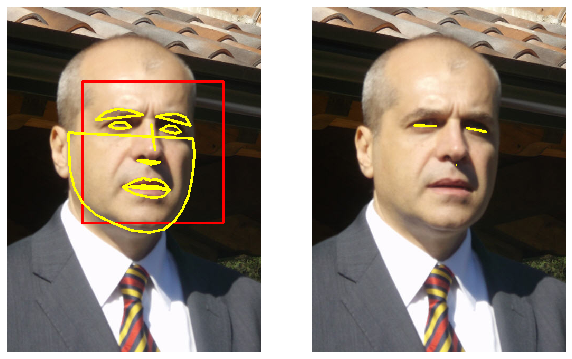

In [6]:
# (2)face_recognition
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import cv2
import face_recognition
# 載入圖片：RBG
image = face_recognition.load_image_file('data/ciaburro.jpg')
image2 = image.copy()

# 1.查詢臉部位置=[(左上x, 左上y, 右下x, 右下y)]
face_locations = face_recognition.face_locations(image)
# 臉部位置 框
for face_location in face_locations:
    cv2.rectangle(image, face_locations[0][:2], face_locations[0][-2:], (255, 0, 0), 3)

# 2-1.FaceLandmarksList=[第一張臉{68個臉部特徵}, ...]
    # 68個臉部特徵
        # {'chin': [下巴(x, y), ... 17個點], 
        #  'left_eyebrow': [左眉毛(x, y), ... 5個點], 'right_eyebrow': [右眉毛(x, y), ... 5個點], 
        #  'nose_bridge': [鼻樑(x, y), ... 4個點], 'nose_tip': [鼻下緣(x, y), ... 5個點], 
        #  'left_eye': [左眼(x, y), ... 6個點], 'right_eye': [右眼(x, y), ... 6個點], 
        #  'top_lip': [嘴唇外圈(x, y), ... 12個點], 'bottom_lip': [嘴唇內圈(x, y), ... 8個點]}
FaceLandmarksList1 = face_recognition.face_landmarks(image)
print('臉總共張數 =', len(FaceLandmarksList1))
# 臉部特徵 折線圖
for face_landmarks in FaceLandmarksList1:
    # 列印 臉部特徵
    for facial_feature in face_landmarks.keys():
        print("{} points: {}".format(facial_feature, face_landmarks[facial_feature]))
    for facial_feature in face_landmarks.keys():
        # face_landmarks[facial_feature]=[特徵(x, y), ...]
        pts = np.array(face_landmarks[facial_feature])
        # 將座標轉為 (頂點數量, 1, 2) 的陣列
        pts = pts.reshape((-1, 1, 2))
        cv2.polylines(image, [pts], True, (255, 255, 0), 4)

# from PIL import Image, ImageDraw
# PilImage = Image.fromarray(image)
# DrawPilImage = ImageDraw.Draw(PilImage)
# # 所有臉
# for face_landmarks in FaceLandmarksList:
#     # 列印 臉部特徵
#     for facial_feature in face_landmarks.keys():
#         print("{} points: {}".format(facial_feature, face_landmarks[facial_feature]))
#     for facial_feature in face_landmarks.keys():
#         DrawPilImage.line(face_landmarks[facial_feature], width=5)
# PilImage.show()

# 2-2.5個臉部特徵
    # [{'nose_tip': [鼻尖(x, y)], 'left_eye': [左眼(x, y), (x, y)], 'right_eye': [右眼(x, y), (x, y)]}]
print('5個臉部特徵')
FaceLandmarksList2 = face_recognition.face_landmarks(image2, None, "small")
print('臉總共張數 =', len(FaceLandmarksList2))
# 臉部特徵 折線圖(同上)
for face_landmarks in FaceLandmarksList2:
    # 列印 臉部特徵
    for facial_feature in face_landmarks.keys():
        print("{} points: {}".format(facial_feature, face_landmarks[facial_feature]))
    for facial_feature in face_landmarks.keys():
        # face_landmarks[facial_feature]=[特徵(x, y), ...]
        pts = np.array(face_landmarks[facial_feature])
        # 將座標轉為 (頂點數量, 1, 2) 的陣列
        pts = pts.reshape((-1, 1, 2))
        cv2.polylines(image2, [pts], True, (255, 255, 0), 4)

# 繪圖
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(image)
plt.axis('off')
plt.subplot(122)
plt.imshow(image2)
plt.axis('off')